
✅ Final Processed Dataset Overview:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0            NaN               0             1                 0  ...   
1            0.0               1             0                 1  ...   
2            0.0               1             1                 0  ...   
3            NaN               1             0                 1  ...   
4            0.0               0             0                 0  ...   

   MonthlyCharges  TotalCharges  Churn  InternetService_Fiber optic  \
0           29.85         

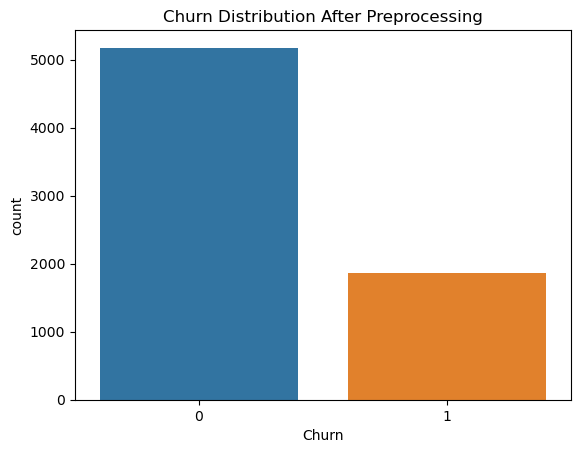

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 1️⃣ Load Dataset
df = pd.read_csv("../backend/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 2️⃣ Handle Missing Values
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Drop 'customerID' if it exists
if "customerID" in df.columns:
    df.drop(columns=["customerID"], inplace=True)

# 3️⃣ Convert Categorical Variables to Numeric

# Convert 'Yes'/'No' Columns to 1/0
yes_no_columns = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for col in yes_no_columns:
    df[col] = df[col].map({"Yes": 1, "No": 0})

# Convert 'gender' to binary (1 = Female, 0 = Male)
df["gender"] = df["gender"].map({"Female": 1, "Male": 0})

# Convert categorical service-related columns (Yes/No format)
service_columns = ["MultipleLines", "OnlineSecurity", "OnlineBackup", 
                   "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
for col in service_columns:
    df[col] = df[col].map({"Yes": 1, "No": 0, "No internet service": 0})

# One-Hot Encode Remaining Categorical Columns
df = pd.get_dummies(df, columns=["InternetService", "Contract", "PaymentMethod"], drop_first=True)

# 4️⃣ Fix Tenure (Ensure it's in integer format, not scaled)
df["tenure"] = df["tenure"].astype(int)

# 5️⃣ Normalize 'MonthlyCharges' & 'TotalCharges' (keeping tenure as integer)
# 5️⃣ Keep 'MonthlyCharges' & 'TotalCharges' in original form (no scaling)
df["MonthlyCharges"] = df["MonthlyCharges"].astype(float)
df["TotalCharges"] = df["TotalCharges"].astype(float)

# 6️⃣ Save the Cleaned Dataset
df.to_csv("../backend/data/cleaned_telco_churn.csv", index=False)

# 7️⃣ Final Check
print("\n✅ Final Processed Dataset Overview:")
print(df.head())  # Display first few rows
print("\n✅ Data Types After Processing:")
print(df.dtypes)  # Confirm all columns are numeric

# 8️⃣ Dataset Summary
print("\n✅ Dataset Summary (After Cleaning):")
print(df.describe())

# 9️⃣ Check the final shape of the dataset
print(f"\n✅ Dataset Final Shape: {df.shape}")

# 🔟 Visualize Churn Distribution
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution After Preprocessing")
plt.show()